# AIAP 14 Assessment - Exploratory Data Analysis

## Preliminaries

### 1. Import packages, import dataset and display first 5 rows of dataframe

In [1]:
# import required modules
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# import dataset
conn = sqlite3.connect("./data/fishing.db")
fishing_df = pd.read_sql_query("SELECT * FROM fishing", conn)
conn.close()

In [3]:
# display first 5 rows of dataset
pd.set_option('display.max_columns', None)
fishing_df.head()

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,ColourOfBoats,AverageTemp
0,2009-03-08,Changi,0.0,7.0,11.2,E,35.0,E,ESE,15.0,19.0,60.0,54.0,MED,Med,4.0,5.0,No,No,blue,33.4
1,2014-11-12,Woodlands,0.0,8.4,9.6,WNW,37.0,NNE,NW,13.0,28.0,60.0,56.0,MeD,LOw,1.0,2.0,None,Yes,blue,35.4
2,2008-08-08,Woodlands,0.0,7.6,11.1,ESE,52.0,SE,E,19.0,19.0,NaN,13.0,Med,MEd,0.0,0.0,None,No,blue,32.8
3,2015-10-12,Changi,0.0,7.2,11.4,NE,31.0,NNW,NE,9.0,13.0,51.0,53.0,hIgh,med,1.0,1.0,No,No,red,31.4
4,2013-10-27,Woodlands,5.6,7.0,8.5,NNW,33.0,N,N,13.0,19.0,68.0,64.0,meD,MeD,6.0,5.0,None,No,grey,35.4


<b>Observations:</b>
1. Target variable is "RainTomorrow" since we are predicting if it rains tomorrow
2. Invalid casing in the pressure columns

### 2. Look at more information and summary statistics of dataframe

In [4]:
# display more information regarding the dataframe
fishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12997 entries, 0 to 12996
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12997 non-null  object 
 1   Location       12997 non-null  object 
 2   Rainfall       12997 non-null  float64
 3   Evaporation    12917 non-null  float64
 4   Sunshine       12939 non-null  float64
 5   WindGustDir    12913 non-null  object 
 6   WindGustSpeed  12917 non-null  float64
 7   WindDir9am     12697 non-null  object 
 8   WindDir3pm     12945 non-null  object 
 9   WindSpeed9am   12992 non-null  float64
 10  WindSpeed3pm   12991 non-null  float64
 11  Humidity9am    12983 non-null  float64
 12  Humidity3pm    12970 non-null  float64
 13  Pressure9am    12995 non-null  object 
 14  Pressure3pm    12989 non-null  object 
 15  Cloud9am       12693 non-null  float64
 16  Cloud3pm       12615 non-null  float64
 17  RainToday      9799 non-null   object 
 18  RainTo

<b>Observations:</b>
1. There are 12997 rows
2. There are many columns with missing data
3. Can change the date column to datetime type
4. Can create a new feature for the month of the year - seasonal rainfall

In [5]:
# summary statistics of the dataframe
fishing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rainfall,12997.0,3.040532,10.958255,0.0,0.00,0.0,0.8,367.6
Evaporation,12917.0,5.551955,2.898708,0.0,3.40,5.4,7.4,44.0
Sunshine,12939.0,6.496236,6.026236,-13.5,3.95,8.7,10.7,13.9
WindGustSpeed,12917.0,36.640164,12.628845,9.0,28.00,35.0,43.0,126.0
WindSpeed9am,12992.0,12.456974,8.341814,0.0,7.00,11.0,17.0,65.0
WindSpeed3pm,12991.0,16.703102,7.882508,0.0,11.00,15.0,20.0,76.0
Humidity9am,12983.0,65.476623,15.460822,11.0,56.00,66.0,76.0,100.0
Humidity3pm,12970.0,50.818813,16.865362,5.0,40.00,51.0,61.0,100.0
Cloud9am,12693.0,4.108879,2.727825,0.0,1.00,4.0,7.0,8.0
Cloud3pm,12615.0,4.124138,2.646195,0.0,1.00,4.0,7.0,8.0


<b>Observations:</b>
1. Negative sunshine values which is invalid because according to data dictionary, sunshine column refers to the number of hours of sunlight

### 3. Closer look at categorical features

In [6]:
# get features of object datatype
categorical_features = fishing_df.select_dtypes("object").columns
display(categorical_features)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'Pressure9am', 'Pressure3pm', 'RainToday', 'RainTomorrow',
       'ColourOfBoats'],
      dtype='object')

In [7]:
for column in categorical_features:
    display(column, fishing_df[column].unique())

'Date'

array(['2009-03-08', '2014-11-12', '2008-08-08', ..., '2015-12-25',
       '2015-04-25', '2012-02-19'], dtype=object)

'Location'

array(['Changi', 'Woodlands', 'Tuas', 'Sentosa'], dtype=object)

'WindGustDir'

array(['E', 'WNW', 'ESE', 'NE', 'NNW', 'S', 'SSW', 'N', 'NW', 'ENE', 'W',
       'WSW', 'SSE', 'SW', 'SE', 'NNE', None, 'NS', 'EW'], dtype=object)

'WindDir9am'

array(['E', 'NNE', 'SE', 'NNW', 'N', 'SSE', 'S', 'WSW', 'ENE', 'WNW',
       'ESE', 'SSW', 'W', 'SW', 'NW', None, 'NE'], dtype=object)

'WindDir3pm'

array(['ESE', 'NW', 'E', 'NE', 'N', 'SSW', 'WNW', 'SSE', 'NNW', 'WSW',
       'NNE', 'ENE', 'SE', 'S', 'SW', 'W', None], dtype=object)

'Pressure9am'

array(['MED', 'MeD', 'Med', 'hIgh', 'meD', 'MEd', 'LOW', 'mED', 'HigH',
       'med', 'loW', 'hIgH', 'HiGh', 'LOw', 'hIGh', 'mEd', 'HIGH', 'lOw',
       'LoW', 'HIgh', 'HiGH', 'higH', 'hIGH', 'hiGH', 'low', 'HIGh',
       'Low', 'lOW', 'High', 'HIgH', 'high', 'hiGh', None], dtype=object)

'Pressure3pm'

array(['Med', 'LOw', 'MEd', 'med', 'MeD', 'MED', 'lOW', 'meD', 'mEd',
       'HiGh', 'high', 'mED', 'LoW', 'HigH', 'HiGH', 'low', 'High', 'Low',
       'hIgH', 'loW', 'HIgh', 'HIGH', 'HIGh', 'higH', 'hIgh', 'LOW',
       'lOw', 'hiGH', 'hiGh', 'HIgH', 'hIGH', 'hIGh', None], dtype=object)

'RainToday'

array(['No', None, 'Yes'], dtype=object)

'RainTomorrow'

array(['No', 'Yes'], dtype=object)

'ColourOfBoats'

array(['blue', 'red', 'grey', 'white'], dtype=object)

<b>Observation:</b>
1. Invalid values in "WindGustDir", NS and EW does not seem to be valid wind directions
2. Confirms the casing issue seen earlier in the dataframe in the pressure columns

## Data cleaning

### 1. Drop duplicate rows

In [8]:
# check if there are duplicates
fishing_df.duplicated().sum()

1182

In [9]:
# drop duplicates
clean_df = fishing_df.drop_duplicates()
clean_df.duplicated().sum()

0

In [10]:
# check number of rows left
display(len(clean_df))

11815

### 2. Address invalid data in the "Sunshine" column

In [11]:
# take a look at the smallest number of hours of sunshine in a day
clean_df["Sunshine"].min()

-13.5

In [12]:
# make all the sunshine values smaller than 0 to be null
clean_df.loc[clean_df["Sunshine"] < 0, "Sunshine"] = np.nan
clean_df["Sunshine"].min()

0.0

### 3. Address invalid data in the "WindGustDir" column

In [13]:
# display values in the column
clean_df["WindGustDir"].unique()

array(['E', 'WNW', 'ESE', 'NE', 'NNW', 'S', 'SSW', 'N', 'NW', 'ENE', 'W',
       'WSW', 'SSE', 'SW', 'SE', 'NNE', None, 'NS', 'EW'], dtype=object)

In [14]:
# make all the wind gust direction value that is NS or EW to be null
clean_df.loc[((clean_df["WindGustDir"] == "NS") | (clean_df["WindGustDir"] == "EW")), "WindGustDir"] = np.nan
clean_df["WindGustDir"].unique()

array(['E', 'WNW', 'ESE', 'NE', 'NNW', 'S', 'SSW', 'N', 'NW', 'ENE', 'W',
       'WSW', 'SSE', 'SW', 'SE', 'NNE', None, nan], dtype=object)

### 4. Address casing issues in pressure columns

In [15]:
# fix casing issues
clean_df.loc[:, "Pressure9am"] = clean_df["Pressure9am"].str.lower()
clean_df.loc[:, "Pressure3pm"] = clean_df["Pressure3pm"].str.lower()
for column in ["Pressure9am", "Pressure3pm"]:
    display(clean_df[column].unique())

array(['med', 'high', 'low', None], dtype=object)

array(['med', 'low', 'high', None], dtype=object)

### 5. Address missing values using simple imputation

In [16]:
# view the columns with missing values
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11815 entries, 0 to 12996
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           11815 non-null  object 
 1   Location       11815 non-null  object 
 2   Rainfall       11815 non-null  float64
 3   Evaporation    11741 non-null  float64
 4   Sunshine       10639 non-null  float64
 5   WindGustDir    11625 non-null  object 
 6   WindGustSpeed  11743 non-null  float64
 7   WindDir9am     11550 non-null  object 
 8   WindDir3pm     11768 non-null  object 
 9   WindSpeed9am   11811 non-null  float64
 10  WindSpeed3pm   11810 non-null  float64
 11  Humidity9am    11801 non-null  float64
 12  Humidity3pm    11790 non-null  float64
 13  Pressure9am    11813 non-null  object 
 14  Pressure3pm    11808 non-null  object 
 15  Cloud9am       11538 non-null  float64
 16  Cloud3pm       11473 non-null  float64
 17  RainToday      8912 non-null   object 
 18  RainTomorro

In [17]:
# impute values using SimpleImputer
mean_imputer = SimpleImputer(strategy="mean")
mode_imputer = SimpleImputer(strategy="most_frequent")

# get numerical and categorical columns
numerical_cols = clean_df.select_dtypes("number").columns
categorical_cols = clean_df.select_dtypes("object").columns

# impute
clean_df = clean_df.fillna(value=np.nan)
clean_df.loc[:, numerical_cols] = mean_imputer.fit_transform(clean_df[numerical_cols])
clean_df.loc[:, categorical_cols] = mode_imputer.fit_transform(clean_df[categorical_cols])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11815 entries, 0 to 12996
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           11815 non-null  object 
 1   Location       11815 non-null  object 
 2   Rainfall       11815 non-null  float64
 3   Evaporation    11815 non-null  float64
 4   Sunshine       11815 non-null  float64
 5   WindGustDir    11815 non-null  object 
 6   WindGustSpeed  11815 non-null  float64
 7   WindDir9am     11815 non-null  object 
 8   WindDir3pm     11815 non-null  object 
 9   WindSpeed9am   11815 non-null  float64
 10  WindSpeed3pm   11815 non-null  float64
 11  Humidity9am    11815 non-null  float64
 12  Humidity3pm    11815 non-null  float64
 13  Pressure9am    11815 non-null  object 
 14  Pressure3pm    11815 non-null  object 
 15  Cloud9am       11815 non-null  float64
 16  Cloud3pm       11815 non-null  float64
 17  RainToday      11815 non-null  object 
 18  RainTomorro

In [18]:
for column in categorical_features:
    display(column, clean_df[column].unique())

'Date'

array(['2009-03-08', '2014-11-12', '2008-08-08', ..., '2015-12-25',
       '2015-04-25', '2012-02-19'], dtype=object)

'Location'

array(['Changi', 'Woodlands', 'Tuas', 'Sentosa'], dtype=object)

'WindGustDir'

array(['E', 'WNW', 'ESE', 'NE', 'NNW', 'S', 'SSW', 'N', 'NW', 'ENE', 'W',
       'WSW', 'SSE', 'SW', 'SE', 'NNE'], dtype=object)

'WindDir9am'

array(['E', 'NNE', 'SE', 'NNW', 'N', 'SSE', 'S', 'WSW', 'ENE', 'WNW',
       'ESE', 'SSW', 'W', 'SW', 'NW', 'NE'], dtype=object)

'WindDir3pm'

array(['ESE', 'NW', 'E', 'NE', 'N', 'SSW', 'WNW', 'SSE', 'NNW', 'WSW',
       'NNE', 'ENE', 'SE', 'S', 'SW', 'W'], dtype=object)

'Pressure9am'

array(['med', 'high', 'low'], dtype=object)

'Pressure3pm'

array(['med', 'low', 'high'], dtype=object)

'RainToday'

array(['No', 'Yes'], dtype=object)

'RainTomorrow'

array(['No', 'Yes'], dtype=object)

'ColourOfBoats'

array(['blue', 'red', 'grey', 'white'], dtype=object)

Looks like we're good to go.

## Feature engineering

### 1. Create month of the year column and date of the month column

One of the columns that might be important is the <b>date</b> because there might be rainy or monsoon seasons. As such, we might want to convert the date column to be of datetime type. Also, we don't want to lose any information regarding the day of the month as well.

In [19]:
# convert to datetime object
clean_df["Date"] = pd.to_datetime(clean_df["Date"])

In [20]:
clean_df["Date"]

0       2009-03-08
1       2014-11-12
2       2008-08-08
3       2015-10-12
4       2013-10-27
           ...    
12991   2011-08-21
12992   2015-06-12
12993   2016-09-29
12995   2011-02-14
12996   2016-03-04
Name: Date, Length: 11815, dtype: datetime64[ns]

In [21]:
# create day and month column in the dataframe
clean_df["Month"] = clean_df["Date"].dt.month
clean_df["Day"] = clean_df["Date"].dt.day

# drop date column
clean_df = clean_df.drop(columns=["Date"])

In [22]:
# display dataframe again
clean_df.head()

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,ColourOfBoats,AverageTemp,Month,Day
0,Changi,0.0,7.0,11.2,E,35.0,E,ESE,15.0,19.0,60.000000,54.0,med,med,4.0,5.0,No,No,blue,33.4,3,8
1,Woodlands,0.0,8.4,9.6,WNW,37.0,NNE,NW,13.0,28.0,60.000000,56.0,med,low,1.0,2.0,No,Yes,blue,35.4,11,12
2,Woodlands,0.0,7.6,11.1,ESE,52.0,SE,E,19.0,19.0,65.489196,13.0,med,med,0.0,0.0,No,No,blue,32.8,8,8
3,Changi,0.0,7.2,11.4,NE,31.0,NNW,NE,9.0,13.0,51.000000,53.0,high,med,1.0,1.0,No,No,red,31.4,10,12
4,Woodlands,5.6,7.0,8.5,NNW,33.0,N,N,13.0,19.0,68.000000,64.0,med,med,6.0,5.0,No,No,grey,35.4,10,27


## Visualizing Data

### 1. Visualizing numerical features

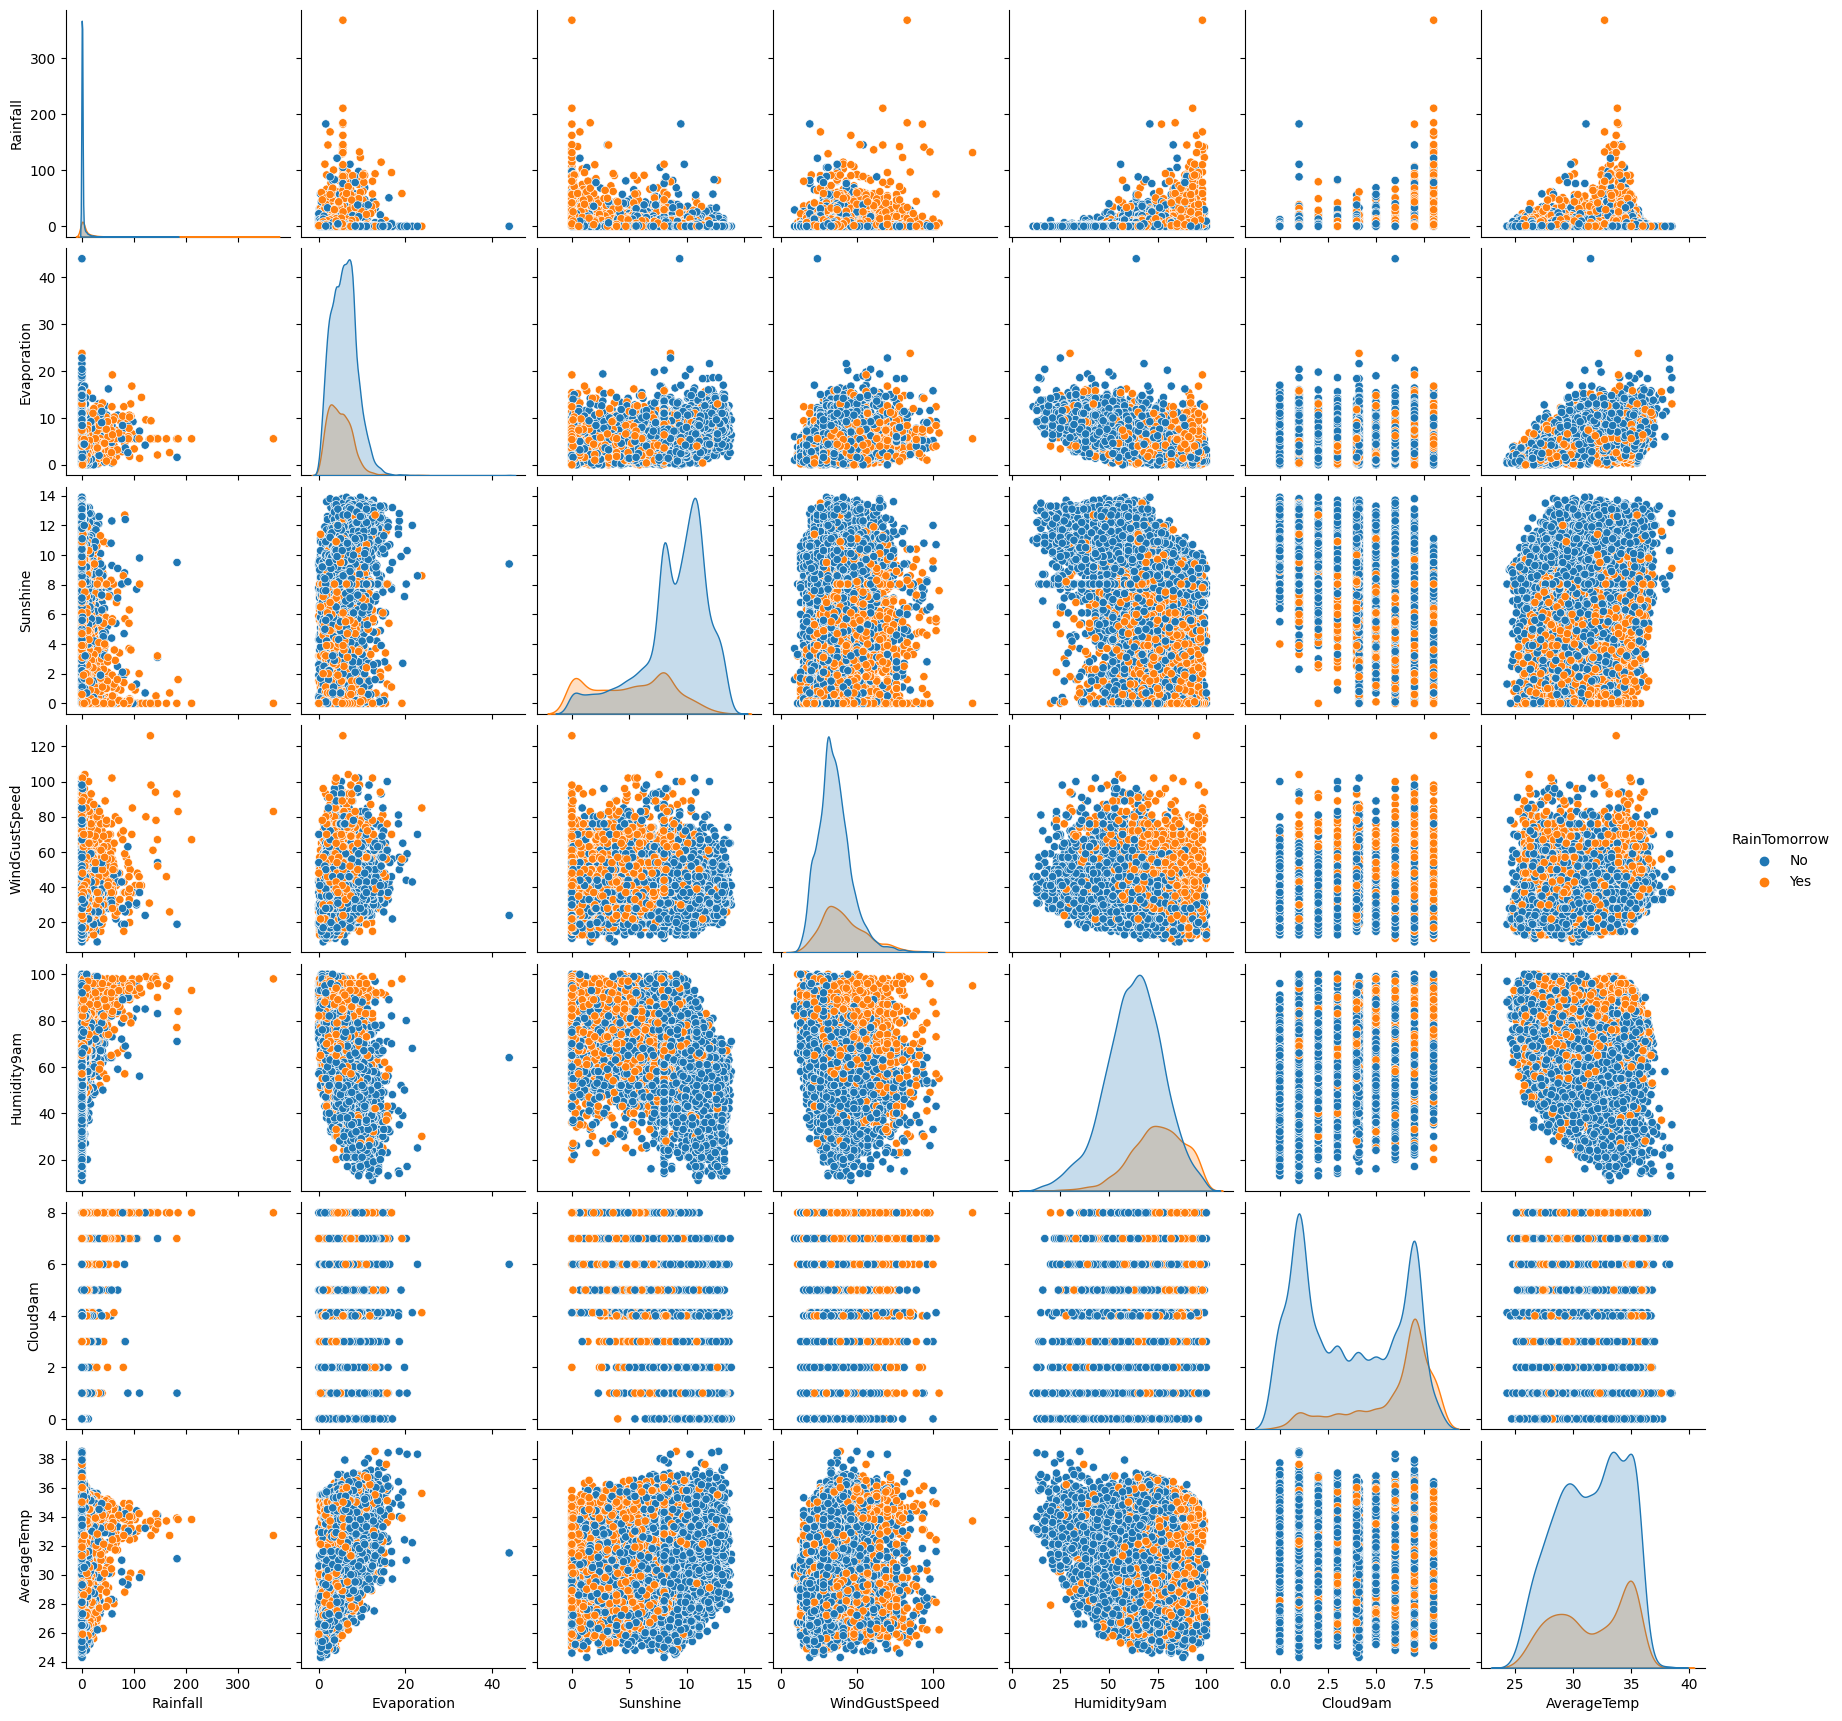

In [23]:
columns_to_visualise = ["Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am", "Cloud9am", "AverageTemp", "RainTomorrow"]
sns.pairplot(clean_df[columns_to_visualise], hue="RainTomorrow")
plt.show()

<b>Observations:</b>
1. Sunshine tends to be lower and rainfall tends to be higher when RainTomorrow = Yes
2. Humidity tends to be higher and at higher rainfall when RainTomorrow = Yes
3. Cloud cover tends to be higher when sunshine is less, rainfall is more and RainTomorrow = Yes
4. Average temperatures become less extreme as rainfall increases
5. Evaporation tends to be higher at higher average temperatures

### 2. Visualizing categorical features

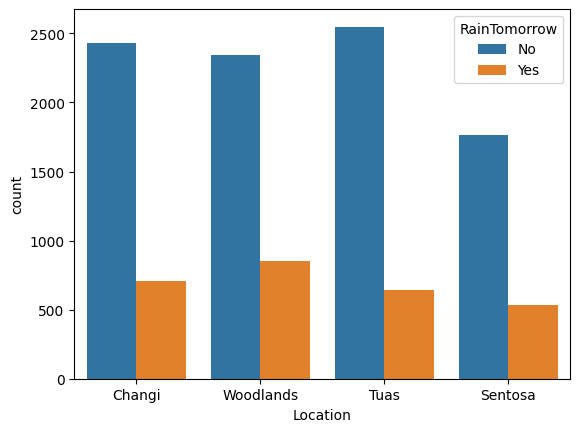

In [24]:
sns.countplot(data=clean_df, x="Location", hue="RainTomorrow")
plt.show()

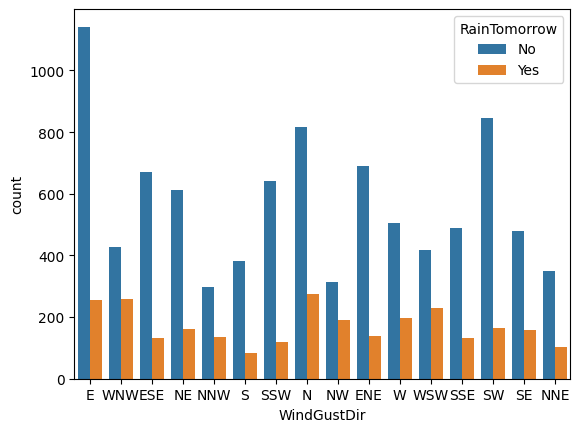

In [25]:
sns.countplot(data=clean_df, x="WindGustDir", hue="RainTomorrow")
plt.show()

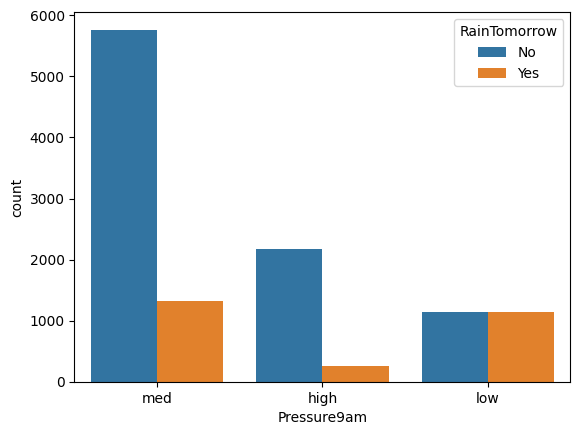

In [26]:
sns.countplot(data=clean_df, x="Pressure9am", hue="RainTomorrow")
plt.show()

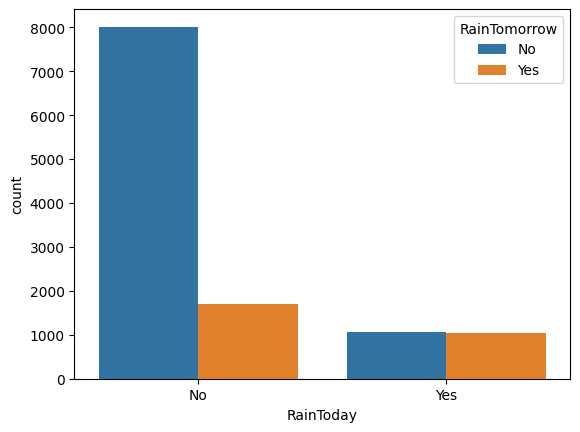

In [27]:
sns.countplot(data=clean_df, x="RainToday", hue="RainTomorrow")
plt.show()

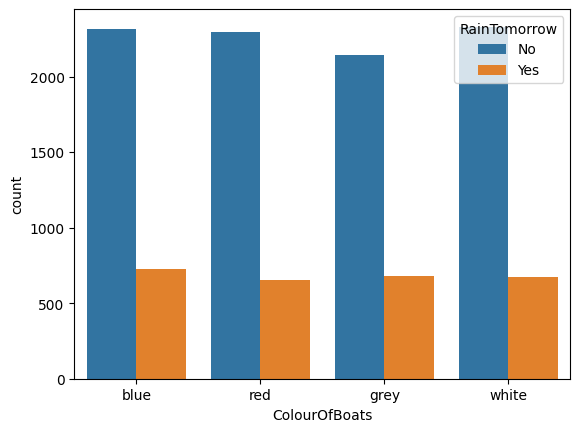

In [28]:
sns.countplot(data=clean_df, x="ColourOfBoats", hue="RainTomorrow")
plt.show()

<b>Observations:</b>
1. Woodlands seems to have more instances of RainTomorrow = Yes
2. Lower 9am pressures seem to have more instances of RainTomorrow = Yes
3. Raining today tends to rain tomorrow
4. Colour of boats and RainTomorrow does not really have any correlation

## Encoding variables

In [29]:
display(clean_df.select_dtypes("object").columns)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Pressure9am',
       'Pressure3pm', 'RainToday', 'RainTomorrow', 'ColourOfBoats'],
      dtype='object')

<b>For ordinal encoding:</b>
1. Pressure9am
2. Pressure3pm
3. RainToday
4. RainTomorrow

<b>For one-hot encoding:</b>
 1. Location
 2. WindGustDir
 3. WindDir9am
 4. WindDir3pm
 5. ColourOfBoats

In [30]:
# setup our encoder
pressure_encoder = LabelEncoder()
pressure_encoder.fit(["low", "med", "high"])
rain_encoder = LabelEncoder()
rain_encoder.fit(["No", "Yes"])

# encode
pressure_columns = ["Pressure9am", "Pressure3pm"]
for col in pressure_columns:
    clean_df[col] = pressure_encoder.transform(clean_df[col])

rain_columns = ["RainToday", "RainTomorrow"]
for col in rain_columns:
    clean_df[col] = rain_encoder.transform(clean_df[col])
    
ohe_columns = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "ColourOfBoats"]
clean_df = pd.get_dummies(data=clean_df, columns=ohe_columns, dtype=int)

# display new df
clean_df.head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,AverageTemp,Month,Day,Location_Changi,Location_Sentosa,Location_Tuas,Location_Woodlands,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,ColourOfBoats_blue,ColourOfBoats_grey,ColourOfBoats_red,ColourOfBoats_white
0,0.0,7.0,11.2,35.0,15.0,19.0,60.000000,54.0,2,2,4.0,5.0,0,0,33.4,3,8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.0,8.4,9.6,37.0,13.0,28.0,60.000000,56.0,2,1,1.0,2.0,0,1,35.4,11,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0.0,7.6,11.1,52.0,19.0,19.0,65.489196,13.0,2,2,0.0,0.0,0,0,32.8,8,8,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.0,7.2,11.4,31.0,9.0,13.0,51.000000,53.0,0,2,1.0,1.0,0,0,31.4,10,12,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5.6,7.0,8.5,33.0,13.0,19.0,68.000000,64.0,2,2,6.0,5.0,0,0,35.4,10,27,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Modelling

### 1. Get the k-value for K Nearest Neighbour

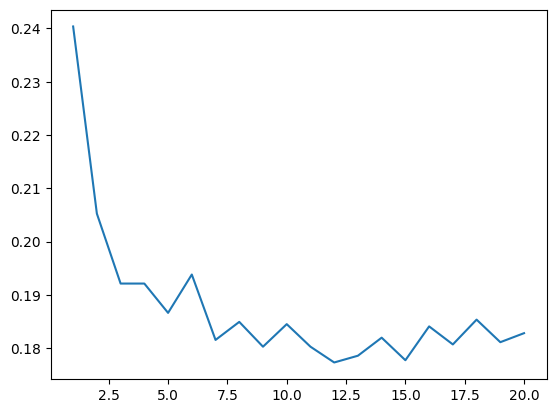

In [31]:
# get y-values (series)
y = clean_df["RainTomorrow"]

# get features (dataframe)
X = clean_df.loc[:, clean_df.columns != "RainTomorrow"]

# feature scaling
X = StandardScaler().fit_transform(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, train_size=.8)

# find the n value where the knn has the lowest error
k = 0
errors = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(np.mean(y_pred != y_test))
    
# plot
sns.lineplot(x=range(1,21), y=errors)
plt.show()

The k-value is 12.